# Linear Regression for Perth House Prices
_________________

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from scipy import stas
#import math 
#import random
#import sys
#import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## Load Data
____________

In [3]:
df = pd.read_csv('all_perth_310121.csv') #read the data 

df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\n,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\n,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\n,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\n,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\n,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [4]:
df.tail()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\n,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\n,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\n,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\n,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN
33655,9E Margaret Street,Midland,295000,3,1,2.0,296,95,NaN,16700,Midland Station,1700,05-2016\n,6056,-31.882163,116.014755,LA SALLE COLLEGE,1.055564,53.0


In [5]:
df.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [6]:
df.shape 

(33656, 19)

## Split the Data

In [7]:
seed=30

In [8]:
df_train, df_test = train_test_split(df ,test_size=0.2,random_state=seed )

In [9]:
df_train, df_val= train_test_split(df_train, test_size=0.25, random_state=seed)

In [10]:
df_train.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
11634,21 Bristol Street,Warnbro,240000,3,1,1.0,694,117,1989.0,42900,Warnbro Station,696,03-2019\n,6169,-32.328550,115.760950,SOUTH COAST BAPTIST COLLEGE,1.502476,NaN
27481,6/17 Civic Gardens,Cannington,410000,3,2,2.0,314,134,1998.0,10000,Queens Park Station,1500,04-2016\n,6107,-32.018563,115.930611,SEVENOAKS SENIOR COLLEGE,1.293955,114.0
21236,4 Portsea Place,Cooloongup,460000,4,2,2.0,913,202,1992.0,38200,Rockingham Station,741,09-2017\n,6168,-32.287140,115.768330,KOLBE CATHOLIC COLLEGE,1.567836,97.0
9314,18a Tulipwood Place,South Lake,350000,3,1,1.0,459,127,1993.0,16200,Murdoch Station,3400,02-2020\n,6164,-32.096960,115.848470,LAKELAND SENIOR HIGH SCHOOL,1.366731,NaN
29915,72 Mary Street,Highgate,815500,2,1,1.0,108,103,1945.0,1900,McIver Station,1600,10-2018\n,6003,-31.936950,115.866880,PERTH COLLEGE,1.035025,9.0


In [11]:
df_train.tail()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
8750,18 Derricap Avenue,Ellenbrook,345000,3,2,2.0,495,161,2005.0,22700,Guildford Station,14300,09-2020\n,6069,-31.770490,115.968150,HOLY CROSS COLLEGE,0.610558,98.0
13304,234 High Road,Riverton,580000,4,3,1.0,815,172,1969.0,10100,Bull Creek Station,3700,08-2018\n,6148,-32.038422,115.891990,ROSSMOYNE SENIOR HIGH SCHOOL,2.202047,16.0
13566,24 Goolema Place,Wanneroo,300000,3,1,3.0,752,109,1976.0,22800,Joondalup Station,4500,05-2018\n,6065,-31.750599,115.814476,WANNEROO SECONDARY COLLEGE,0.811889,131.0
1841,106 Le Souef Drive,Kardinya,760000,4,2,2.0,799,242,1995.0,13000,Murdoch Station,4100,01-2020\n,6163,-32.060350,115.807570,MELVILLE SENIOR HIGH SCHOOL,1.574131,61.0
1492,10 Wade Street,Embleton,449000,3,1,2.0,519,92,1962.0,7600,Bayswater Station,2100,08-2015\n,6062,-31.899402,115.910434,JOHN FORREST SECONDARY COLLEGE,1.045343,74.0


In [12]:
df_train.index

Int64Index([11634, 27481, 21236,  9314, 29915, 23536, 31542, 28405, 30720,
             7386,
            ...
            28398,  2304,  9823,  5744, 26472,  8750, 13304, 13566,  1841,
             1492],
           dtype='int64', length=20193)

In [13]:
df_train=df_train.reset_index()

In [14]:
df_train.head(5)

,index,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,11634,21 Bristol Street,Warnbro,240000,3,1,1.0,694,117,1989.0,42900,Warnbro Station,696,03-2019\n,6169,-32.328550,115.760950,SOUTH COAST BAPTIST COLLEGE,1.502476,NaN
1,27481,6/17 Civic Gardens,Cannington,410000,3,2,2.0,314,134,1998.0,10000,Queens Park Station,1500,04-2016\n,6107,-32.018563,115.930611,SEVENOAKS SENIOR COLLEGE,1.293955,114.0
2,21236,4 Portsea Place,Cooloongup,460000,4,2,2.0,913,202,1992.0,38200,Rockingham Station,741,09-2017\n,6168,-32.287140,115.768330,KOLBE CATHOLIC COLLEGE,1.567836,97.0
3,9314,18a Tulipwood Place,South Lake,350000,3,1,1.0,459,127,1993.0,16200,Murdoch Station,3400,02-2020\n,6164,-32.096960,115.848470,LAKELAND SENIOR HIGH SCHOOL,1.366731,NaN
4,29915,72 Mary Street,Highgate,815500,2,1,1.0,108,103,1945.0,1900,McIver Station,1600,10-2018\n,6003,-31.936950,115.866880,PERTH COLLEGE,1.035025,9.0


In [15]:
df_train=df_train.drop(['index'], axis=1)

In [16]:
df_train.head(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,21 Bristol Street,Warnbro,240000,3,1,1.0,694,117,1989.0,42900,Warnbro Station,696,03-2019\n,6169,-32.328550,115.760950,SOUTH COAST BAPTIST COLLEGE,1.502476,NaN
1,6/17 Civic Gardens,Cannington,410000,3,2,2.0,314,134,1998.0,10000,Queens Park Station,1500,04-2016\n,6107,-32.018563,115.930611,SEVENOAKS SENIOR COLLEGE,1.293955,114.0
2,4 Portsea Place,Cooloongup,460000,4,2,2.0,913,202,1992.0,38200,Rockingham Station,741,09-2017\n,6168,-32.287140,115.768330,KOLBE CATHOLIC COLLEGE,1.567836,97.0
3,18a Tulipwood Place,South Lake,350000,3,1,1.0,459,127,1993.0,16200,Murdoch Station,3400,02-2020\n,6164,-32.096960,115.848470,LAKELAND SENIOR HIGH SCHOOL,1.366731,NaN
4,72 Mary Street,Highgate,815500,2,1,1.0,108,103,1945.0,1900,McIver Station,1600,10-2018\n,6003,-31.936950,115.866880,PERTH COLLEGE,1.035025,9.0


In [17]:
df_train.shape 

(20193, 19)

In [18]:
df_train.sample(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
6028,30 Tristania Rise,Duncraig,1050000,4,2,NaN,754,342,1991.0,13600,Warwick Station,356,11-2019\n,6023,-31.843730,115.792760,CARINE SENIOR HIGH SCHOOL,1.901550,47.0
4466,5 Palmerose Court,North Lake,550000,4,2,2.0,734,105,1988.0,14600,Murdoch Station,3300,08-2014\n,6163,-32.078500,115.818440,NORTH LAKE SENIOR CAMPUS,0.710660,NaN
14240,11 Tredegar Street,Butler,300000,3,3,2.0,221,118,2015.0,38100,Butler Station,309,01-2019\n,6036,-31.637975,115.698997,BUTLER COLLEGE,1.778313,39.0
9916,6 Bahama Way,Banksia Grove,365000,3,2,2.0,381,160,2011.0,29300,Clarkson Station,6200,10-2019\n,6031,-31.693206,115.803102,JOSEPH BANKS SECONDARY COLLEGE,0.865795,92.0
3398,20 Killarney Street,Mount Hawthorn,900000,3,1,2.0,491,96,NaN,4500,Glendalough Station,1100,08-2020\n,6016,-31.917211,115.834808,BOLD PARK COMMUNITY SCHOOL,1.322140,NaN


In [19]:
df_train.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20193 entries, 0 to 20192
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           20193 non-null  object 
 1   SUBURB            20193 non-null  object 
 2   PRICE             20193 non-null  int64  
 3   BEDROOMS          20193 non-null  int64  
 4   BATHROOMS         20193 non-null  int64  
 5   GARAGE            18692 non-null  float64
 6   LAND_AREA         20193 non-null  int64  
 7   FLOOR_AREA        20193 non-null  int64  
 8   BUILD_YEAR        18367 non-null  float64
 9   CBD_DIST          20193 non-null  int64  
 10  NEAREST_STN       20193 non-null  object 
 11  NEAREST_STN_DIST  20193 non-null  int64  
 12  DATE_SOLD         20193 non-null  object 
 13  POSTCODE          20193 non-null  int64  
 14  LATITUDE          20193 non-null  float64
 15  LONGITUDE         20193 non-null  float64
 16  NEAREST_SCH       20193 non-null  object

In [21]:
df_train.dtypes

ADDRESS              object
SUBURB               object
PRICE                 int64
BEDROOMS              int64
BATHROOMS             int64
GARAGE              float64
LAND_AREA             int64
FLOOR_AREA            int64
BUILD_YEAR          float64
CBD_DIST              int64
NEAREST_STN          object
NEAREST_STN_DIST      int64
DATE_SOLD            object
POSTCODE              int64
LATITUDE            float64
LONGITUDE           float64
NEAREST_SCH          object
NEAREST_SCH_DIST    float64
NEAREST_SCH_RANK    float64
dtype: object

In [22]:
df_train.isnull().sum()

ADDRESS                0
SUBURB                 0
PRICE                  0
BEDROOMS               0
BATHROOMS              0
GARAGE              1501
LAND_AREA              0
FLOOR_AREA             0
BUILD_YEAR          1826
CBD_DIST               0
NEAREST_STN            0
NEAREST_STN_DIST       0
DATE_SOLD              0
POSTCODE               0
LATITUDE               0
LONGITUDE              0
NEAREST_SCH            0
NEAREST_SCH_DIST       0
NEAREST_SCH_RANK    6533
dtype: int64

In [23]:
df_train['GARAGE'].unique() 

array([ 1.,  2., nan,  3.,  4.,  6.,  7.,  5., 14.,  8., 13., 11., 12.,
       10.,  9., 20., 18., 16., 50., 32., 21., 99., 31.])

In [24]:
df_train['GARAGE'] = df_train['GARAGE'].replace('NA',0)

In [25]:
df_train['GARAGE'] = df_train['GARAGE'].replace('inf',0)

In [26]:
df_train['GARAGE'] = df_train['GARAGE'].astype(float)

In [27]:
df_train['DATE_SOLD'] = pd.to_datetime(df_train['DATE_SOLD'])

In [28]:
df_train['GARAGE'].dtype

dtype('float64')

In [29]:
df_train['DATE_SOLD'].dtype

dtype('<M8[ns]')

In [30]:
df_train['GARAGE'] = df_train['GARAGE'].fillna(0)

In [31]:
df_train['GARAGE']

0        1.0
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
20188    2.0
20189    1.0
20190    3.0
20191    2.0
20192    2.0
Name: GARAGE, Length: 20193, dtype: float64

In [32]:
df_train.isnull().sum()

ADDRESS                0
SUBURB                 0
PRICE                  0
BEDROOMS               0
BATHROOMS              0
GARAGE                 0
LAND_AREA              0
FLOOR_AREA             0
BUILD_YEAR          1826
CBD_DIST               0
NEAREST_STN            0
NEAREST_STN_DIST       0
DATE_SOLD              0
POSTCODE               0
LATITUDE               0
LONGITUDE              0
NEAREST_SCH            0
NEAREST_SCH_DIST       0
NEAREST_SCH_RANK    6533
dtype: int64

In [33]:
df_train=df_train.drop(['BUILD_YEAR'], axis=1)

In [34]:
df_train=df_train.drop(['NEAREST_SCH_RANK'], axis=1)

In [35]:
df_train=df_train.drop(['POSTCODE'], axis=1)

In [36]:
df_train.isnull().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
dtype: int64

In [37]:
df_train.dtypes

ADDRESS                     object
SUBURB                      object
PRICE                        int64
BEDROOMS                     int64
BATHROOMS                    int64
GARAGE                     float64
LAND_AREA                    int64
FLOOR_AREA                   int64
CBD_DIST                     int64
NEAREST_STN                 object
NEAREST_STN_DIST             int64
DATE_SOLD           datetime64[ns]
LATITUDE                   float64
LONGITUDE                  float64
NEAREST_SCH                 object
NEAREST_SCH_DIST           float64
dtype: object

In [38]:
df_train.duplicated() 

0        False
1        False
2        False
3        False
4        False
         ...  
20188    False
20189    False
20190    False
20191    False
20192    False
Length: 20193, dtype: bool

## Check for Outliers (Boxplot)

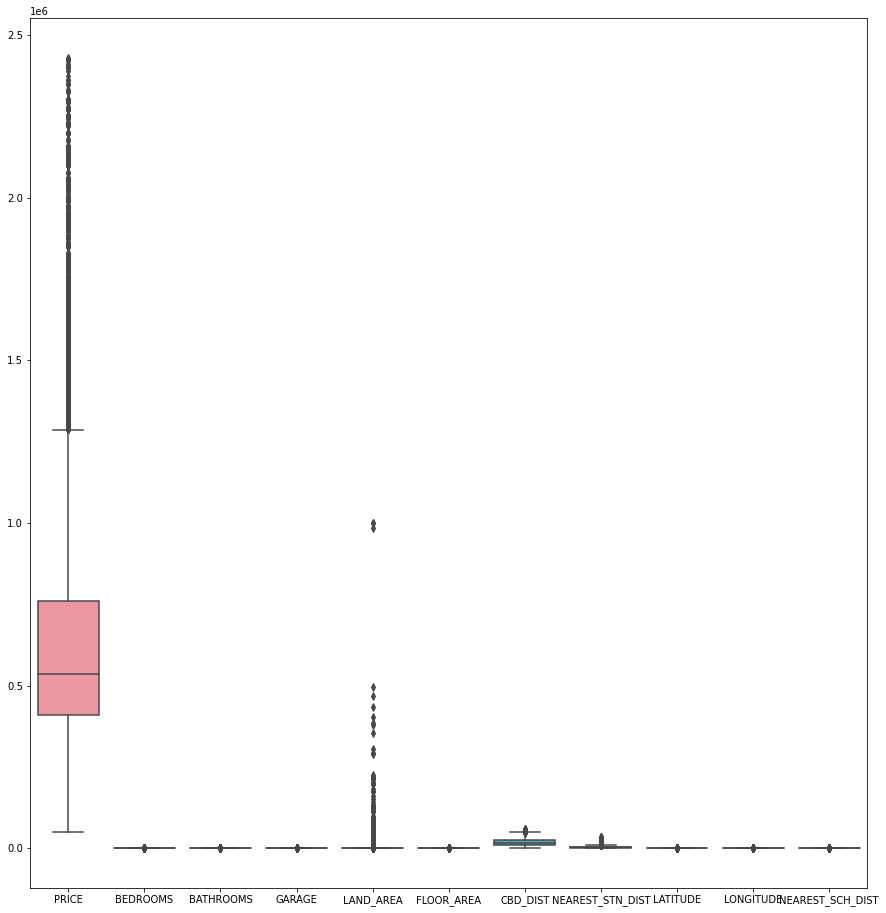

In [39]:
plt.figure(figsize=(15,16))
sns.boxplot(data=df_train);


In [40]:
df_train.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
count,2.019300e+04,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000
mean,6.352311e+05,3.663151,1.826177,2.040806,2715.811766,183.360620,19797.037538,4517.463725,-31.958525,115.879040,1.806231
std,3.525550e+05,0.743193,0.586001,1.523495,17318.705898,71.715561,11350.563313,4489.170209,0.177796,0.118510,1.718350
min,5.100000e+04,1.000000,1.000000,0.000000,72.000000,1.000000,681.000000,46.000000,-32.472979,115.583610,0.075953
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,11200.000000,1800.000000,-32.066640,115.790140,0.880060
50%,5.350000e+05,4.000000,2.000000,2.000000,680.000000,172.000000,17500.000000,3200.000000,-31.929481,115.853816,1.342713
75%,7.600000e+05,4.000000,2.000000,2.000000,836.000000,222.000000,26600.000000,5300.000000,-31.840880,115.970000,2.102082
max,2.430000e+06,9.000000,16.000000,99.000000,999999.000000,870.000000,59800.000000,35500.000000,-31.462553,116.343201,20.720911


In [41]:
df_train.corr()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
PRICE,1.000000,0.254398,0.362853,0.129307,0.056254,0.544272,-0.358701,-0.099466,0.042714,-0.181081,-0.024164
BEDROOMS,0.254398,1.000000,0.550118,0.188325,0.047534,0.540977,0.121283,0.098027,0.008500,-0.012349,0.084390
BATHROOMS,0.362853,0.550118,1.000000,0.201324,0.029928,0.556126,0.039724,0.036830,0.042557,-0.089036,0.059532
GARAGE,0.129307,0.188325,0.201324,1.000000,0.033253,0.167029,0.028340,0.067516,-0.016407,0.056838,0.059003
LAND_AREA,0.056254,0.047534,0.029928,0.033253,1.000000,0.072857,0.127083,0.206571,-0.023262,0.132673,0.259245
FLOOR_AREA,0.544272,0.540977,0.556126,0.167029,0.072857,1.000000,0.020215,0.101766,0.033783,-0.044152,0.119944
CBD_DIST,-0.358701,0.121283,0.039724,0.028340,0.127083,0.020215,1.000000,0.443774,-0.185903,-0.061024,0.369858
NEAREST_STN_DIST,-0.099466,0.098027,0.036830,0.067516,0.206571,0.101766,0.443774,1.000000,0.049480,0.499769,0.626377
LATITUDE,0.042714,0.008500,0.042557,-0.016407,-0.023262,0.033783,-0.185903,0.049480,1.000000,-0.110841,0.017543
LONGITUDE,-0.181081,-0.012349,-0.089036,0.056838,0.132673,-0.044152,-0.061024,0.499769,-0.110841,1.000000,0.302915


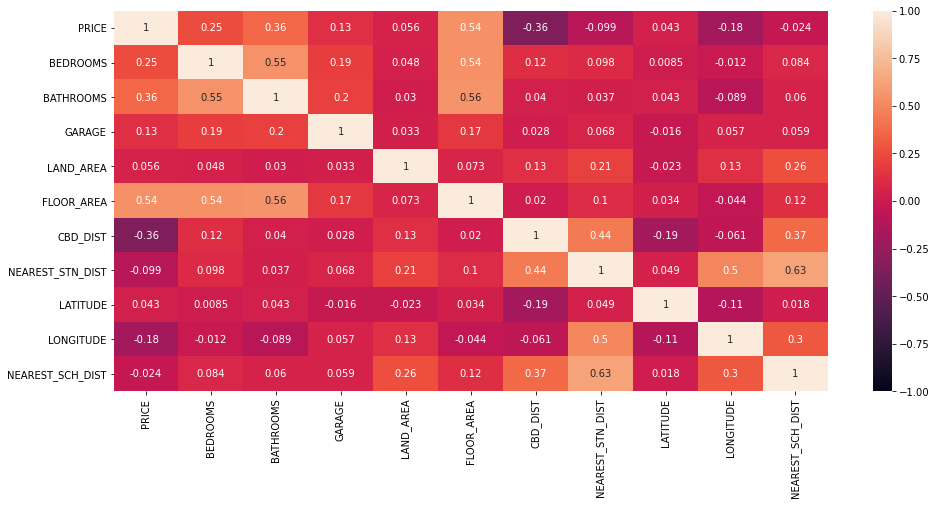

In [42]:
plt.figure(figsize=(16,7))
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1 );


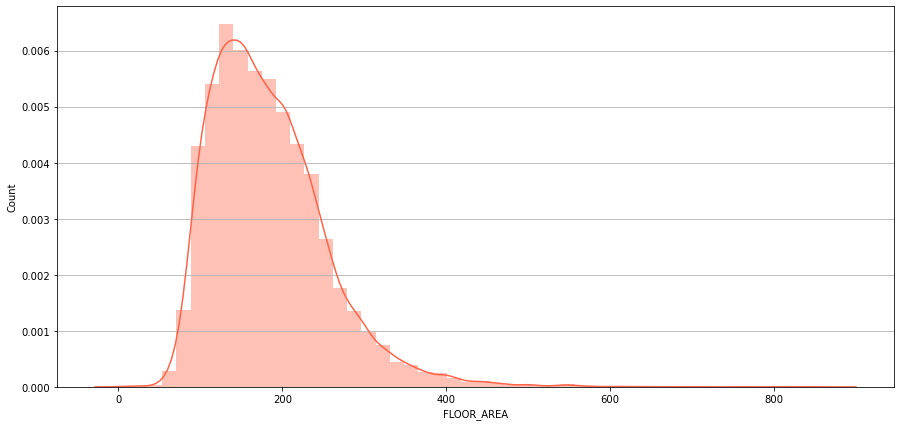

In [43]:
fig, ax = plt.subplots(figsize=[15,7])
ax = sns.distplot(df_train["FLOOR_AREA"], color='tomato')
ax.grid(axis='y')
plt.xlabel("FLOOR_AREA")
plt.ylabel("Count")
plt.show()

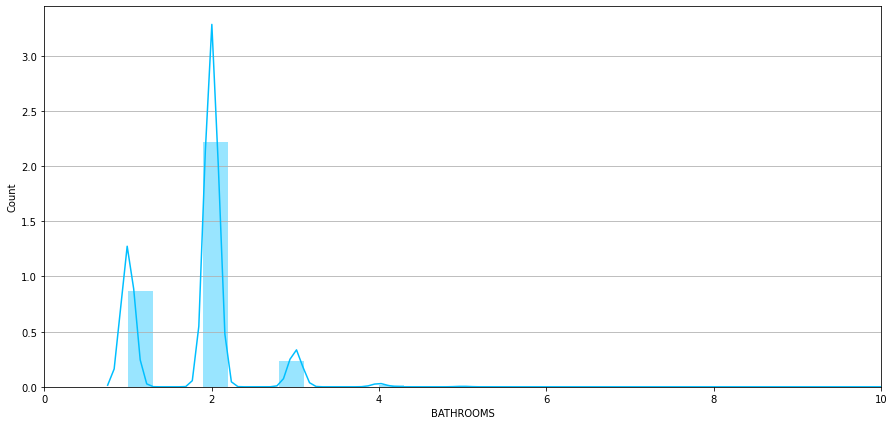

In [44]:
fig, ax = plt.subplots(figsize=[15,7])
ax = sns.distplot(df_train["BATHROOMS"], color='deepskyblue')
ax.grid(axis='y')
plt.xlim([0,10])
plt.xlabel("BATHROOMS")
plt.ylabel("Count")
plt.show()

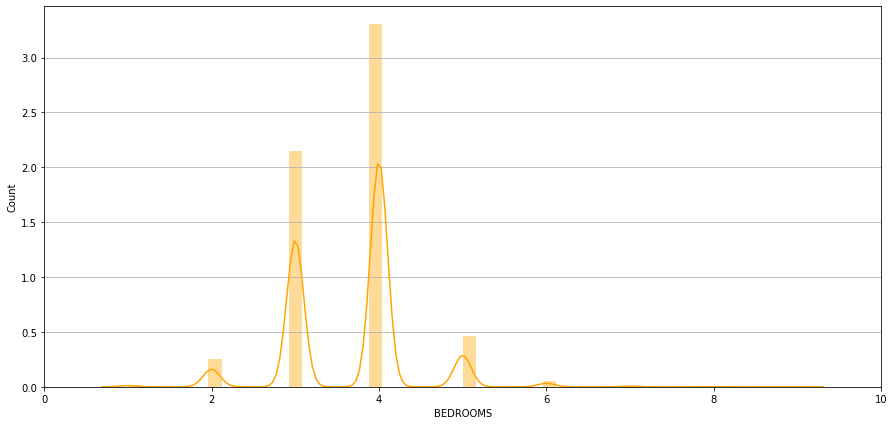

In [45]:
fig, ax = plt.subplots(figsize=[15,7])
ax = sns.distplot(df_train["BEDROOMS"], color='orange')
plt.xlim([0,10])
ax.grid(axis='y')
plt.xlabel("BEDROOMS")
plt.ylabel("Count")
plt.show()

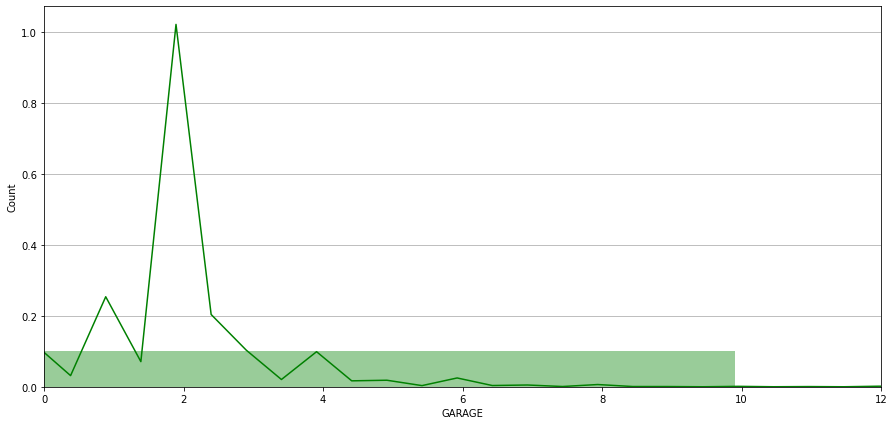

In [46]:
fig, ax = plt.subplots(figsize=[15,7])
ax = sns.distplot(df_train['GARAGE'], bins=10, color='g')
plt.xlim([0,12])
ax.grid(axis='y')
plt.xlabel("GARAGE")
plt.ylabel("Count")
plt.show()

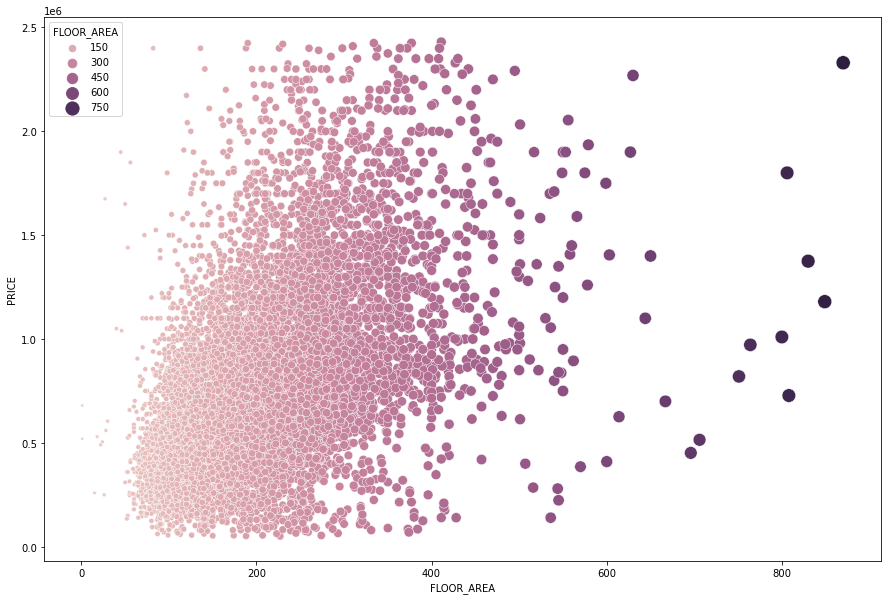

In [47]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="FLOOR_AREA", y="PRICE",hue="FLOOR_AREA", size ="FLOOR_AREA", sizes=(10, 200),
data=df_train)
plt.xlabel("FLOOR_AREA")
plt.ylabel("PRICE")
plt.show()

In [48]:
#sns.pairplot(df_train)

In [49]:
df_train['ADDRESS'].unique()

array(['21 Bristol Street', '6/17 Civic Gardens', '4 Portsea Place', ...,
       '24 Goolema Place', '106 Le Souef Drive', '10 Wade Street'],
      dtype=object)

In [90]:
#df_train['SUBURB'].unique() 

In [91]:
#df_train['NEAREST_STN'].unique()

In [92]:
#df_train['NEAREST_SCH'].unique()

## Split the Data

In [127]:
df_train=df_train.select_dtypes(exclude=['object'])

In [132]:
df_train

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,DATE_SOLD,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
0,240000,3,1,1.0,694,117,42900,696,2019-03-01,-32.328550,115.760950,1.502476
1,410000,3,2,2.0,314,134,10000,1500,2016-04-01,-32.018563,115.930611,1.293955
2,460000,4,2,2.0,913,202,38200,741,2017-09-01,-32.287140,115.768330,1.567836
3,350000,3,1,1.0,459,127,16200,3400,2020-02-01,-32.096960,115.848470,1.366731
4,815500,2,1,1.0,108,103,1900,1600,2018-10-01,-31.936950,115.866880,1.035025
...,...,...,...,...,...,...,...,...,...,...,...,...
20188,345000,3,2,2.0,495,161,22700,14300,2020-09-01,-31.770490,115.968150,0.610558
20189,580000,4,3,1.0,815,172,10100,3700,2018-08-01,-32.038422,115.891990,2.202047
20190,300000,3,1,3.0,752,109,22800,4500,2018-05-01,-31.750599,115.814476,0.811889
20191,760000,4,2,2.0,799,242,13000,4100,2020-01-01,-32.060350,115.807570,1.574131


In [129]:
x_train, y_train = df_train.drop('PRICE',axis=1),df_train['PRICE']

In [130]:
x_train=x_train.drop(['NEAREST_STN_DIST'], axis=1)

In [131]:
x_train=x_train.drop(['LAND_AREA'], axis=1)

In [133]:
x_train=x_train.drop(['LATITUDE'], axis=1)

In [134]:
x_train=x_train.drop(['LONGITUDE'], axis=1)

In [140]:
x_train=x_train.drop(['DATE_SOLD'], axis=1)

In [141]:
x_train

,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,CBD_DIST,NEAREST_SCH_DIST
0,3,1,1.0,117,42900,1.502476
1,3,2,2.0,134,10000,1.293955
2,4,2,2.0,202,38200,1.567836
3,3,1,1.0,127,16200,1.366731
4,2,1,1.0,103,1900,1.035025
...,...,...,...,...,...,...
20188,3,2,2.0,161,22700,0.610558
20189,4,3,1.0,172,10100,2.202047
20190,3,1,3.0,109,22800,0.811889
20191,4,2,2.0,242,13000,1.574131


In [124]:
#x_train=pd.get_dummies(x_train)
#x_train

In [142]:
x_train.shape

(20193, 6)

In [143]:
y_train.shape

(20193,)

In [144]:
x_train.dtypes

BEDROOMS              int64
BATHROOMS             int64
GARAGE              float64
FLOOR_AREA            int64
CBD_DIST              int64
NEAREST_SCH_DIST    float64
dtype: object

In [145]:
y_train

0        240000
1        410000
2        460000
3        350000
4        815500
          ...  
20188    345000
20189    580000
20190    300000
20191    760000
20192    449000
Name: PRICE, Length: 20193, dtype: int64

In [146]:
mod1 = LinearRegression()

In [112]:
#x_train= x_train.transpose()

In [147]:
mod1.fit(x_train, y_train)

LinearRegression()

In [149]:
mod1.score(x_train, y_train)

0.44531433952440835